In [57]:
import os
import numpy as np
from pathlib import Path
from scipy.io import wavfile
from matplotlib import pyplot as plt

src = './Dataset/wav/'
gender = 'female'

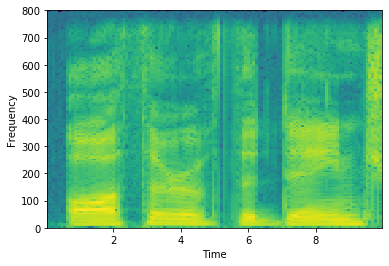

In [62]:
sf, sd = wavfile.read(src+'male/arctic_a0001.wav')

plt.specgram(sd[:sf],Fs=sf)

plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [59]:
data = []
test = []
train = []

dir = src + gender + '/'

for f in os.listdir(dir):
  sf, sd = wavfile.read(dir + f)

  time = 1
  length = len(sd)/sf

  while time < length:
    data.append(sd[(time-1)*sf:time*sf])
    time += 1

In [60]:
n = len(data)

train = data[:int(0.6*n)]
test = data[int(-0.4*n):]

In [61]:
dst = './Dataset/array/'
Path(dst).mkdir(parents=True, exist_ok=True)
dst += gender + '.npy'

np.save(dst, data, allow_pickle=True)